In [1]:
import sys
import os


# Data manipulation
import pandas as pd
import numpy as np


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train_data = pd.read_csv('../data/train.csv')

# All categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns: ", categorical_cols)

train_data.head()




Categorical Columns:  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
# View data shape
print(train_data.shape)

train_data.info()

train_data.describe()

print("\nMissing values per column:\n", train_data.isnull().sum())

print("\nTarget column value counts:\n", train_data['satisfaction'].value_counts())



(103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location             

In [3]:
# 1 Balance Check
balance_check = train_data['satisfaction'].value_counts(normalize=True).mul(100).round(2)
print("\nBalance Check:\n", balance_check)

# 2 Handle missing values(sorted)
train_data.isnull().sum().sort_values(ascending=False).head(10)

# 3 Peek at categorical distributions

for c in ['Gender','Customer Type','Type of Travel','Class']:
    print("\n", c)
    print(train_data[c].value_counts(normalize=True).mul(100).round(1).head())




Balance Check:
 satisfaction
neutral or dissatisfied    56.67
satisfied                  43.33
Name: proportion, dtype: float64

 Gender
Gender
Female    50.7
Male      49.3
Name: proportion, dtype: float64

 Customer Type
Customer Type
Loyal Customer       81.7
disloyal Customer    18.3
Name: proportion, dtype: float64

 Type of Travel
Type of Travel
Business travel    69.0
Personal Travel    31.0
Name: proportion, dtype: float64

 Class
Class
Business    47.8
Eco         45.0
Eco Plus     7.2
Name: proportion, dtype: float64


In [4]:
# Drop unnecessary columns (but NOT 'satisfaction')
train_data = train_data.drop(columns=['Unnamed: 0', 'id'], errors='ignore')

# Map all possible satisfaction values to 0 or 1
def encode_satisfaction(s):
    s = str(s).strip().lower()
    if s == 'satisfied':
        return 1
    if s in {'neutral or dissatisfied', 'neutral', 'dissatisfied'}:
        return 0
    return np.nan  # unknowns -> NaN so we can drop them

train_data['satisfaction'] = train_data['satisfaction'].apply(encode_satisfaction)

# Drop rows with missing satisfaction after mapping
train_data = train_data.dropna(subset=['satisfaction'])

# Check columns and shape
print(train_data.columns)
print("Rows after cleaning:", train_data.shape[0])

# Split features and target
X = train_data.drop(columns=['satisfaction'])
y = train_data['satisfaction']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("y value counts:\n", y.value_counts())


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Rows after cleaning: 103904
X shape: (103904, 22)
y shape: (103904,)
y value counts:
 satisfaction
0    58879
1    45025
Name: count, dtype: int64


In [5]:
# Handle Missing Values
print("Missing values by column:")
print(train_data.isnull().sum().sort_values(ascending=False).head())

if 'Arrival Delays in Minutes' in train_data.columns:
    median_delay = train_data['Arrival Delays in Minutes'].median()
    train_data['Arrival Delays in Minutes'] = train_data['Arrival Delays in Minutes'].fillna(median_delay)
    print("Filled missing 'Arrival Delays in Minutes' with median:", median_delay)
else:
    print("Column 'Arrival Delays in Minutes' not found in train_data.")

Missing values by column:
Arrival Delay in Minutes      310
Gender                          0
Seat comfort                    0
Departure Delay in Minutes      0
Cleanliness                     0
dtype: int64
Column 'Arrival Delays in Minutes' not found in train_data.


In [6]:

# --- 0) Build X/y from the cleaned dataframe (satisfaction already encoded 0/1) ---
X = train_data.drop(columns=['satisfaction'])
y = train_data['satisfaction']

# Sanity checks
assert y.nunique() == 2, "Target must have 2 classes (0/1)."
assert not y.isna().any(), "Target y has NaNs. Encode & drop NaNs first."

# --- 1) Column lists FROM X (not train_data) ---
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
assert len(num_cols) + len(cat_cols) == X.shape[1], "Some columns not assigned to num/cat."

# --- 2) Split BEFORE fitting pipeline ---
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3) Pipeline ---
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy import sparse

# OneHotEncoder version-compat
ohe_kwargs = {"handle_unknown": "ignore", "min_frequency": 50}
try:
    OneHotEncoder(sparse_output=True, **ohe_kwargs)  # probe
    ohe = OneHotEncoder(sparse_output=True, **ohe_kwargs)
except TypeError:
    ohe = OneHotEncoder(sparse=True, **ohe_kwargs)

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler(quantile_range=(10, 90))),
])

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", ohe),
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop",
    sparse_threshold=1.0
)

def _clip_after_preproc(Xt, cap=8.0):
    if sparse.issparse(Xt):
        Xt = Xt.tocoo()
        Xt.data = np.clip(Xt.data, -cap, cap)
        return Xt.tocsr()
    return np.clip(Xt, -cap, cap)

from sklearn.preprocessing import FunctionTransformer
clipper = FunctionTransformer(_clip_after_preproc, accept_sparse=True, kw_args={"cap": 8.0})

clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clip", clipper),
    ("logreg", LogisticRegression(
        solver="saga",
        penalty="elasticnet",
        l1_ratio=0.10,
        C=0.05,
        max_iter=5000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

# --- 4) Fit & evaluate ---
from sklearn.metrics import classification_report, roc_auc_score

clf.fit(X_train, y_train)
y_pred  = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred))
print("ROC-AUC:", round(roc_auc_score(y_val, y_proba), 4))
 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11776
           1       0.84      0.86      0.85      9005

    accuracy                           0.87     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781

ROC-AUC: 0.9281


In [7]:
import numpy as np
import pandas as pd
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError

# Ensure the pipeline is fitted
try:
    check_is_fitted(clf.named_steps["preprocessor"])
except NotFittedError:
    clf.fit(X_train, y_train)  # fit the whole pipeline

# Feature names from the fitted ColumnTransformer
pre = clf.named_steps["preprocessor"]
feature_names = pre.get_feature_names_out()  # uses fitted transformers_

# Find final estimator
final_step_name = list(clf.named_steps.keys())[-1]
final_estimator = clf.named_steps[final_step_name]

# Coefficients from the fitted LogisticRegression
coefs = final_estimator.coef_.ravel()

if "variance" in clf.named_steps:
    mask = clf.named_steps["variance"].get_support()
    feature_names = feature_names[mask]
    coefs = coefs[mask]

# Assemble and sort
coef_df = (
    pd.DataFrame({"feature": feature_names, "coefficient": coefs})
      .assign(abs_coef=lambda d: d["coefficient"].abs())
      .sort_values("abs_coef", ascending=False)
)

print(coef_df.head(20))


                                   feature  coefficient  abs_coef
7                     num__Online boarding     2.222116  2.222116
2               num__Inflight wifi service     1.628663  1.628663
23     cat__Type of Travel_Personal Travel    -1.547209  1.547209
21    cat__Customer Type_disloyal Customer    -1.232734  1.232734
13                    num__Checkin service     1.223997  1.223997
10                   num__On-board service     1.089765  1.089765
22     cat__Type of Travel_Business travel     1.035096  1.035096
11                   num__Leg room service     0.967463  0.967463
15                        num__Cleanliness     0.798253  0.798253
20       cat__Customer Type_Loyal Customer     0.720621  0.720621
4              num__Ease of Online booking    -0.565419  0.565419
26                     cat__Class_Eco Plus    -0.456018  0.456018
3   num__Departure/Arrival time convenient    -0.455652  0.455652
24                     cat__Class_Business     0.408798  0.408798
12        

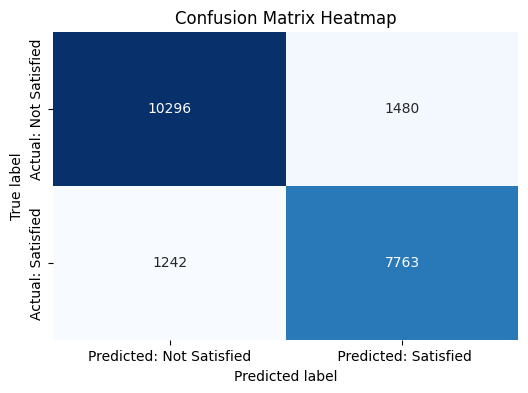

In [8]:
# Data Visualization: Confusion Matrix Heatmap


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: Not Satisfied', ' Predicted: Satisfied'],
            yticklabels=['Actual: Not Satisfied', 'Actual: Satisfied']
            )

plt.title('Confusion Matrix Heatmap')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



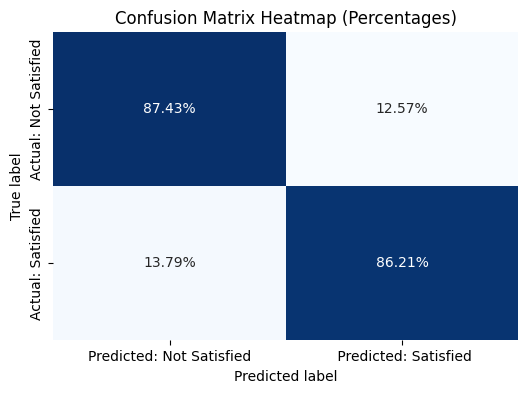

In [9]:
# Data Visualization: Confusion Matrix Heatmap (Percentages)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

# Normalize to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted: Not Satisfied', ' Predicted: Satisfied'],
            yticklabels=['Actual: Not Satisfied', 'Actual: Satisfied']
            )

plt.title('Confusion Matrix Heatmap (Percentages)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

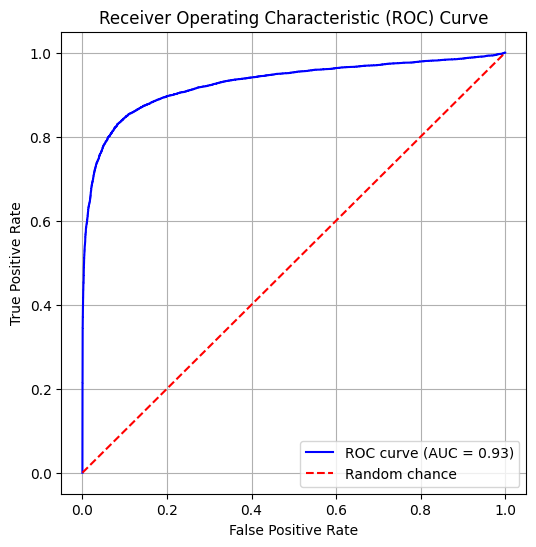

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1 Get predicted probabilities from the model
y_probs = clf.predict_proba(X_val)[:, 1]  # Probability estimates for the positive class

# 2 Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_val, y_probs)

# Calculate AUC
auc_score = roc_auc_score(y_val, y_probs)

# 4 Plot the curve

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


In [11]:
# Save Model
import joblib

joblib.dump(clf, 'model.joblib')
print("Model saved as model.joblib")

Model saved as model.joblib
